<hr/>

# Data Mining 
**Tamás Budavári** - budavari@jhu.edu <br/>

- Regularization
- Principal Component Analysis
- Lagrange multipliers
- Explained variance 

<hr/>

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ **basis** functions 

>$\displaystyle f(t;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(t) $
><br/><br/>
> It's a dot product
>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$

- Evaluated at all data points $x=(x_1,x_2,\dots,x_N)$

>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol{}X\boldsymbol\beta$
><br/><br/>
> where $X_{ik} = \phi_k(x_i)$





### Method of Least Squares

- At the optimum

>$\displaystyle {\hat\beta} = (X^T X)^{-1} X^T {y} $

- Hat matrix

>$\hat{y} = X\boldsymbol{\hat\beta} = H {y}$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


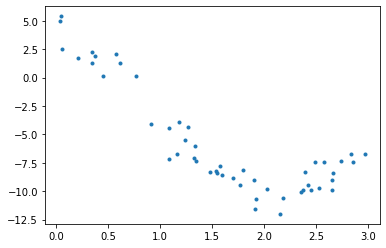

In [2]:
# generate a dataset with errors
x = 3 * random.rand(50) # uniform between 0 and 3
eps = 1 * random.randn(x.size) # normal noise
y = 10*cos(x+1) + eps;  plot(x,y,'.');

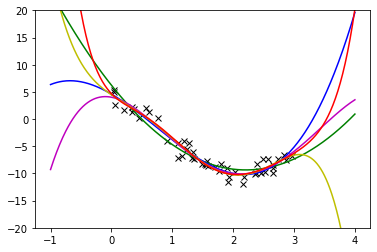

In [3]:
def poly(x,n):
    X = np.zeros((x.size,n+1));
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X

# show data in black
plot(x,y,'kx'); ylim(-20,20);

xx = np.linspace(-1,4,500) # grid on x
color = 'yrgbm' * 5 # color sequence
for n in range(2, 7):
    X = poly(x,n) # design matrix for fitting
    bHat = linalg.pinv(X) @ y
    yy = poly(xx,n) @ bHat # prediction
    plot(xx,yy,'-',c=color[n]);     

### Regularization

Penalize large coefficients in $\beta$

- **Ridge regression** uses $L_2$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \,\rvert^2_2\ + \lambda\,\lvert\beta\rvert^2_2$  
><br/>
> or even with a constant matrix $\Gamma$
><br/><br/>
> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \,\rvert^2_2 + \lambda\,\lvert\Gamma\beta\rvert^2_2$  

- **Lasso regression** uses $L_1$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta}  \, \lvert y- X\beta \,\rvert^2_2 + \lambda\,\lvert\beta\rvert_1$ 
><br/><br/>
> $L_1$ yields sparse results

Different geometric meanings! 

### Linear Combinations

- Coefficients mix a given set of basis vectors, functions, images, shapes, ...

$$ f(x;\beta) = \sum_k \beta_k \phi_k(x) $$

> Fourier series

<img src=files/Periodic_identity_function.gif width=400> 
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/e/e8/Periodic_identity_function.gif width=400> -->

> Discrete Cosine Transform (JPEG) 

<img src=files/DCT_basis_thumb.gif width=200>
<!--<img src=http://www.digitude.net/blog/wp-content/uploads/2010/07/DCT_basis_thumb.gif width=200>-->

> Spherical Harmonics

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spherical_Harmonics.png/300px-Spherical_Harmonics.png>
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spherical_Harmonics.png/300px-Spherical_Harmonics.png>-->

- What is a good basis like?



<h1><font color="darkblue">Principal Component Analysis</font></h1>

### Statistical Learning

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



<img src=files/800px-GaussianScatterPCA.png width=300 align=left>

### Directions of Maximum Variance

- Let $X\in\mathbb{R}^N$ be a continuous random variable with $\mathbb{E}\left[X\right]=0$ mean and covariance matrix $C$. What is the direction of maximum variance?

> For any vector $a\in\mathbb{R}^N$ 
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = \mathbb{E}\left[(a^T X)(X^T a)\right] = \mathbb{E}\left[a^T(XX^T)\,a\right]$
><br/><br/>
> so
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = a^T\,\mathbb{E}\!\left[XX^T\right]\,a = a^T C\,a$
><br/><br/>
> We have to maximize this such that $a^2\!=\!1$

### Constrained Optimization

- **Lagrange multiplier**: extra term with new parameter $\lambda$

> $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1)\right]$

- Partial derivatives vanish at optimum

> $\displaystyle \frac{\partial}{\partial\lambda} \rightarrow\ \  \hat{a}^2\!-\!1 = 0\ \ $  (duh!)
><br/><br/>
> $\displaystyle \frac{\partial}{\partial a_k} \rightarrow\ \  $?

### With indices


> $\displaystyle \max_{a\in{}\mathbb{R}^N}  \left[ \sum_{i,j} a_i C_{ij} a_j - \lambda\,\left(\sum_i a_i^2 - 1\right) \right]$

- Partial derivatives $\partial \big/ \partial a_k$ vanish at optimum

> $\displaystyle \sum_{i,j} \frac{\partial a_i}{\partial a_k} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \frac{\partial a_j}{\partial a_k} - 2\lambda\,\left(\sum_i a_i \frac{\partial a_i}{\partial a_k}\right)  $ 
> $=\displaystyle \sum_{i,j} \delta_{ik} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \delta_{jk} - 2\lambda\,\left(\sum_i a_i \delta_{ik}\right)  $ 
> $=\displaystyle \sum_{j} C_{kj} a_j + \sum_{i} a_i C_{ik}  - 2\lambda\,a_k $


### And back again...

- With vectors and matrices

> $\displaystyle  C \hat{a} + C^T\hat{a} - 2\lambda \hat{a} = 0$
><br/><br/>
> but $C$ is symmetric 
><br/><br/>
> $\displaystyle  C\,\hat{a} = \lambda\,\hat{a} $

- Eigenproblem !!

### Result

- The value of maximum variance is

> $\displaystyle  \hat{a}^TC\,\hat{a} = \hat{a}^T \lambda\,\hat{a} = \lambda\, \hat{a}^T\hat{a} = \lambda$
><br/><br/>
> the largest eigenvalue $\lambda_1$

- The direction of maximum variance is the corresponding eigenvector $a_1$

> $\displaystyle  Ca_1 = \lambda_1 a_1 $

- This is the **1st Principal Component** 




### 2nd Principal Component

- Direction of largest variance uncorrelated to 1st PC

> $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1) - \lambda'(a^T C\,a_1) \right]$

- Partial derivatives vanish at optimum

> $\displaystyle 2C\,\hat{a} - 2\lambda\,\hat{a}-\lambda'Ca_1 = 0$

### Result

- Multiply by $a_1^T\cdot$

> $\displaystyle 2a_1^TC\hat{a} - 2a_1^T\lambda{}\hat{a}-a_1^T\lambda'Ca_1 = 0$
><br/><br/>
> $\displaystyle 0 - 0 - \lambda'\lambda_1 = 0 \ \ \rightarrow\ \  \lambda'=0$

- Still just an eigenproblem 

> $\displaystyle  C\,\hat{a} = \lambda\,\hat{a} $

- Solution $\lambda_2$ and $a_2$

### PCA 

- Spectral decomposition or eigenvalue decomposition or eigendecomposition

> Let $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_N\geq{}0$ be the eigenvalues of $C$ and ${e}_1,\dots,{e}_N$ the corresponding eigenvectors
><br/><br/>
> $\displaystyle  C = \sum_{k=1}^N\ \lambda_k\left({e}_k\,{e}_k^T\right) $
><br/><br/>
> Consider $\displaystyle C\,e_l = \sum_k \lambda_k\,e_k\left(e_k^T e_l\right) = \lambda_l\,e_l$ for any $l$

- Matrix form

> With diagonal $\Lambda$ matrix of the eigenvalues and an $E$ matrix of $[{e}_1, \dots, {e}_N]$
><br/><br/>
> $\displaystyle  C = E\ \Lambda\ E^T$


- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best approximation is taking the first $K$ PCs
><br/><br/>
> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) =  E_K\Lambda_KE_K^T$





### New Coordiante System

- The $E$ matrix of eigenvectors is a rotation, $E\,E^T = I$

> $\displaystyle  Z = E^T\, X $


- A truncated set of eigenvectors $E_K$ defines a projection

> $\displaystyle  Z_K = E_K^T\, X $
><br/><br/>
> and
><br/><br/>
> $\displaystyle  X_K = E_K Z_K = E_K E_K^T\, X = P_K\,X $




### Detour: Projections

- If the square of a matrix is equal to itself

> $\displaystyle  P^2 = P $

- For example, projecting on the ${e}$ unit vector

<img src=files/Y7Gx8.png align=right width=250>

> Scalar times vector
><br/><br/>
> $\displaystyle  r' = {e}\left({e}^T r\right) = {e}\,\beta_r$
><br/><br/>
> Or  projection of vector $r$
><br/><br/>
> $\displaystyle  r' = \left({e}\,{e}^T\right)r = P\,r$




### Again

- The eigenvectors of largest eigenvalues capture the most variance

> $\displaystyle  C \approx C_K = \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) = \sum_{k=1}^K\ \lambda_k\,P_k$

- And the remaining eigenvectors span the subspace with the least variance

> $\displaystyle  C - C_K = %\sum_{l=K+1}^N\ \lambda_l\left(\hat{e}_l\,\hat{e}_l^T\right) =
\sum_{l=K+1}^N\ \lambda_l\,P_l$


### Samples

- Set of $N$-vectors arranged in matrix $X=\left[x_1, x_2, \dots, x_n \right]$ with average of 0 <br>
<font color="red">*This is NOT the random variable we talked about previously but the data matrix!*</font>

> Sample covariance matrix is
><br/><br/>
>$\displaystyle C = \frac{1}{n\!-\!1}\ X X^T = \frac{1}{n\!-\!1}\  \sum_i x_i x_i^T$

- Singular Value Decomposition (SVD)

>$\displaystyle X = U W V^T$
><br/><br/>
> where $U^TU=I$, $W$ is diagonal, and $V^TV=I$

- Hence

>$\displaystyle C = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T$
><br/><br/>
> So, if $C=E\Lambda E^T$ then $E = U$ and $\displaystyle \Lambda = \frac{1}{n\!-\!1}\  W^2$



### Random Sample from Bivariate Normal 

- See previous lecture

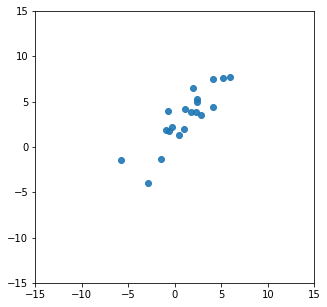

In [4]:
from scipy.stats import norm
# generate multiple 2-D (column) vectors
S = norm.rvs(0,1,(2,20))
S[0,:] *= 4  # scale axis 0
f = +pi/4    # rotate by 45 degrees
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)
X += np.array([[1],[3]]) # shift

figure(figsize=(5,5)); xlim(-15,15); ylim(-15,15);
plot(X[0,:],X[1,:],'o',alpha=0.9)

In [5]:
# subtract sample mean
avg = mean(X, axis=1).reshape(X[:,1].size,1)
X -= avg
# sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) 
print ("Average\n", avg)
print ("Covariance\n", C)

Average
 [[1.13546308]
 [3.26810886]]
Covariance
 [[7.83353716 7.60849969]
 [7.60849969 9.67179656]]


In [6]:
L, E = np.linalg.eig(C)
E, L

(array([[-0.74830845, -0.66335093],
        [ 0.66335093, -0.74830845]]),
 array([ 1.08885142, 16.41648229]))

In [9]:
E, L, E_same = np.linalg.svd(C)
E, L

(array([[-0.66335093, -0.74830845],
        [-0.74830845,  0.66335093]]),
 array([16.41648229,  1.08885142]))

In [26]:
E.dot(E.T)

array([[ 1.00000000e+00, -8.47439775e-17],
       [-8.47439775e-17,  1.00000000e+00]])

In [27]:
np.allclose( E.T, np.linalg.inv(E) )

True

In [28]:
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size-1)

(array([[-0.69270174, -0.72122417],
        [-0.72122417,  0.69270174]]), array([11.84341555,  0.66106307]))

In [29]:
# alternatively
U, W**2 / (X.shape[1]-1)

(array([[-0.69270174, -0.72122417],
        [-0.72122417,  0.69270174]]), array([11.84341555,  0.66106307]))

In [30]:
[ np.allclose( U.dot(U.T), np.eye(U.shape[0]) ), 
  np.allclose( V.dot(V.T), np.eye(V.shape[0]) )  ]

[True, True]

In [11]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=X.shape[0])
pca.fit(X.T) # different convention: row vs col !!!
pca.components_.T, pca.explained_variance_

(array([[-0.66335093, -0.74830845],
        [-0.74830845,  0.66335093]]),
 array([16.41648229,  1.08885142]))